#### >>Reading the DATASET 

In [14]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df= pd.read_csv('out.csv')
df = df.iloc[:,1:]
df

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_basement,lat
0,221900.0,3,1.00,1180,1.0,0,0,7,0,47.5112
1,538000.0,3,2.25,2570,2.0,0,0,7,400,47.7210
2,180000.0,2,1.00,770,1.0,0,0,6,0,47.7379
3,604000.0,4,3.00,1960,1.0,0,0,7,910,47.5208
4,510000.0,3,2.00,1680,1.0,0,0,8,0,47.6168
...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,0,8,0,47.6993
21609,400000.0,4,2.50,2310,2.0,0,0,8,0,47.5107
21610,402101.0,2,0.75,1020,2.0,0,0,7,0,47.5944
21611,400000.0,3,2.50,1600,2.0,0,0,8,0,47.5345


##### >> Normalize the features

In [15]:
# Normalize the features
df.iloc[:, :] = (df - df.mean())/df.std()
df

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_basement,lat
0,-0.866697,-0.398728,-1.447430,-0.979812,-0.915406,-0.087171,-0.305752,-0.558823,-0.658666,-0.352564
1,-0.005688,-0.398728,0.175603,0.533622,0.936484,-0.087171,-0.305752,-0.558823,0.245136,1.161541
2,-0.980827,-1.473925,-1.447430,-1.426221,-0.915406,-0.087171,-0.305752,-1.409554,-0.658666,1.283507
3,0.174086,0.676469,1.149422,-0.130547,-0.915406,-0.087171,-0.305752,-0.558823,1.397483,-0.283281
4,-0.081956,-0.398728,-0.149004,-0.435412,-0.915406,-0.087171,-0.305752,0.291909,-0.658666,0.409541
...,...,...,...,...,...,...,...,...,...,...
21608,-0.490533,-0.398728,0.500209,-0.598732,2.788374,-0.087171,-0.305752,0.291909,-0.658666,1.004935
21609,-0.381579,0.676469,0.500209,0.250534,0.936484,-0.087171,-0.305752,0.291909,-0.658666,-0.356172
21610,-0.375856,-1.473925,-1.772037,-1.154021,0.936484,-0.087171,-0.305752,-0.558823,-0.658666,0.247882
21611,-0.381579,-0.398728,0.500209,-0.522516,0.936484,-0.087171,-0.305752,0.291909,-0.658666,-0.184410


#### setup the X Features and y target

In [34]:
x = df.iloc[:,1:]
X = np.hstack((np.ones((x.shape[0],1)), x))

Y = df.iloc[:,0]  #Y = price
Y.shape

(21613,)

#### Dividing the dataset into X_test, X_train, Y_test and Y_train

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)
#test_size=0.3 --> 30% of X and Y are X_test & y_test | 70% of X_polly and Y are X_train & y_train
X_test.shape

(6484, 10)

#### >> Setup the model usign sckitlean library

In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

#### >> Training phase 

In [37]:
model.fit(X_train,y_train)

LinearRegression()

In [38]:
yHat_train =  model.predict(X_train)
yHat_test =  model.predict(X_test)

#### Display the graph that compares yHat_train with y_train 

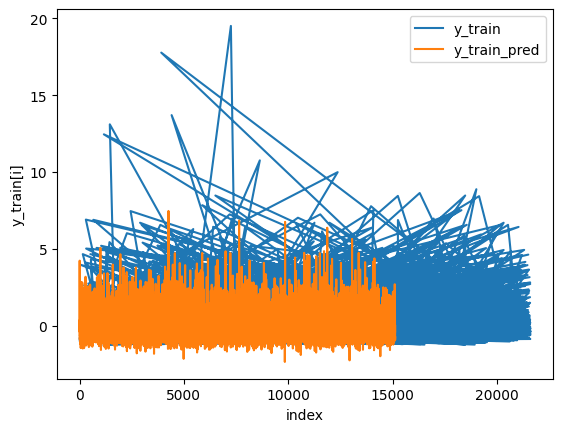

In [42]:
plt.plot(y_train, label='y_train')
plt.plot(yHat_train, label='y_train_pred')
plt.xlabel('index')
plt.ylabel('y_train[i]')
plt.legend()
plt.show()

#### Cost functions : AED , MSE , RMSE

In [47]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
MAE = mean_absolute_error(y_train,yHat_train)
MSE = mean_squared_error(y_train,yHat_train)
RMSE = np.sqrt(MSE)
print(">> MSE : ",MSE , " | RMSE : ",RMSE)
print(">> Accuracy : ",r2_score(y_train,yHat_train)*100,"%")
print(">> Accuracy : ",r2_score(y_test,yHat_test)*100,"%")

>> MSE :  0.3417739687199458  | RMSE :  0.5846143760804603
>> Accuracy :  65.2125698078208 %
>> Accuracy :  66.94271882496002 %


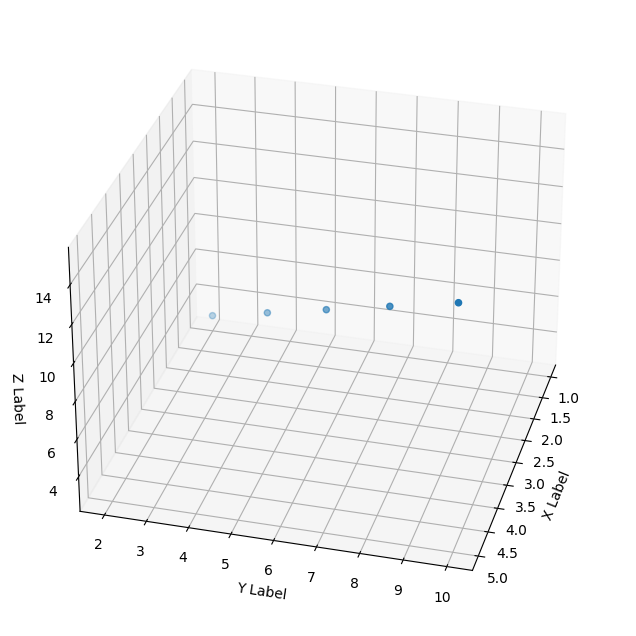

In [58]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd

# Create sample data
df = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'y': [2, 4, 6, 8, 10],
    'z': [3, 6, 9, 12, 15]
})

# Create 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['x'], df['y'], df['z'])

# Set axis labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.view_init(elev=30, azim=15)
# Show plot
plt.show()


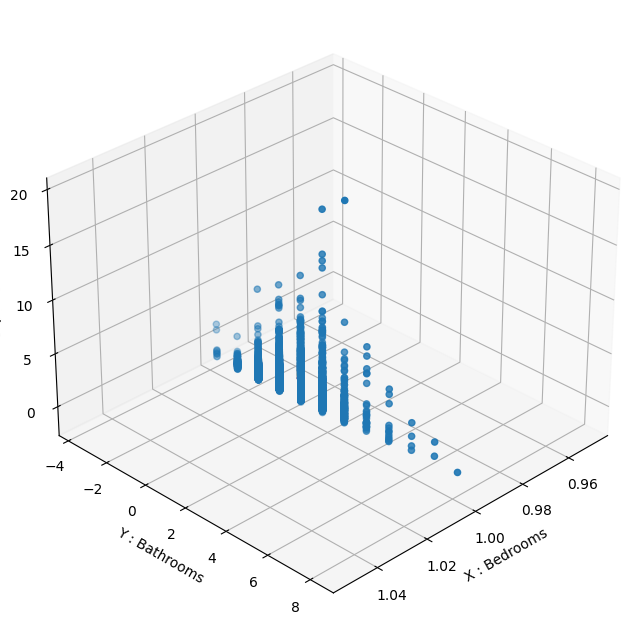

In [61]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd

# Create sample data
df = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'y': [2, 4, 6, 8, 10],
    'z': [3, 6, 9, 12, 15]
})

# Create 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train)

# Set axis labels
ax.set_xlabel('X : Bedrooms')
ax.set_ylabel('Y : Bathrooms')
ax.set_zlabel('Z : Price')

ax.view_init(elev=30, azim=45)
# Show plot
plt.show()
